In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot: >

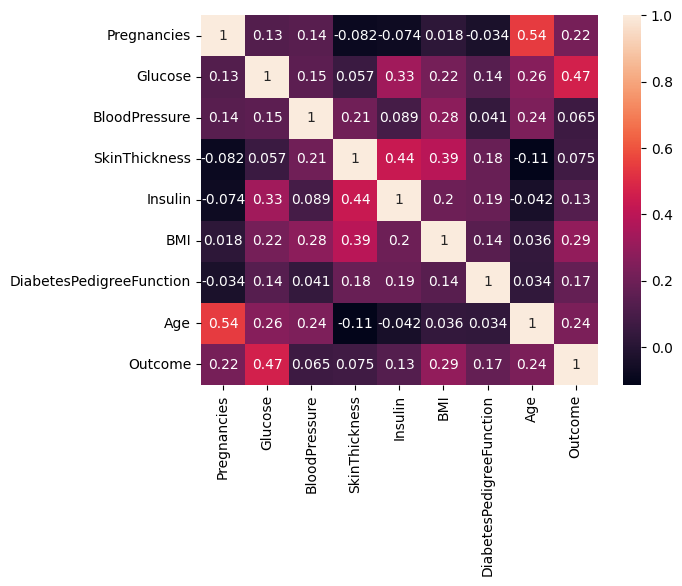

In [7]:
sns.heatmap(df.corr(), annot=True)

<Figure size 3000x3000 with 0 Axes>

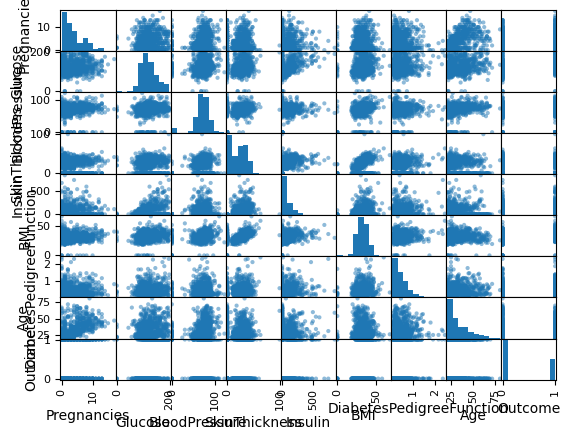

In [10]:
plt.figure(figsize=(30,30))
pd.plotting.scatter_matrix(df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], train_size=0.8)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7272727272727273

In [15]:
clf.coef_

array([[ 0.34963031,  1.15763903, -0.1624519 ,  0.0947203 , -0.14645171,
         0.61580058,  0.28856051,  0.22673688]])

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=800)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7727272727272727

In [35]:
clf2.feature_importances_

array([0.08169029, 0.27306293, 0.08758646, 0.07063478, 0.06716025,
       0.15552117, 0.12350895, 0.14083517])

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.7272727272727273

In [38]:
from sklearn.metrics import precision_recall_fscore_support
preds1 = clf.predict(X_test)
preds2 = clf2.predict(X_test)
preds3 = clf3.predict(X_test)

prf1 = precision_recall_fscore_support(y_test, preds1)
prf2 = precision_recall_fscore_support(y_test, preds2)
prf3 = precision_recall_fscore_support(y_test, preds3)

print(f'Logistic Regression ->  Precisions: {prf1[0]}, Recall: {prf1[1]}, F1-Score: {prf1[2]}')
print(f'Random Forest ->  Precisions: {prf2[0]}, Recall: {prf2[1]}, F1-Score: {prf2[2]}')
print(f'SVC ->  Precisions: {prf3[0]}, Recall: {prf3[1]}, F1-Score: {prf3[2]}')

Logistic Regression ->  Precisions: [0.78504673 0.59574468], Recall: [0.81553398 0.54901961], F1-Score: [0.8        0.57142857]
Random Forest ->  Precisions: [0.82075472 0.66666667], Recall: [0.84466019 0.62745098], F1-Score: [0.83253589 0.64646465]
SVC ->  Precisions: [0.78504673 0.59574468], Recall: [0.81553398 0.54901961], F1-Score: [0.8        0.57142857]
